In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.cluster import KMeans

points = pd.read_csv("Kmeans.csv")

In [22]:
points

,x,y
0,0.10,0.60
1,0.15,0.71
2,0.08,0.90
3,0.16,0.85
4,0.20,0.30
5,0.25,0.50
6,0.24,0.10
7,0.30,0.20


In [23]:
X = np.array(points)

K-Means Clustering Implementation

In [24]:
def dist(A,B):
    xd=(A[0]-B[0])**2
    yd=(A[1]-B[1])**2
    d=math.sqrt(xd+yd)
    return d

In [25]:
def cluster(C1,C2):
    cluster1=list()
    cluster2=list()
    c1=C1
    c2=C2
    for p in X:
        d1=dist(p,C1)
        d2=dist(p,C2)
        if d1<d2:
          cluster1.append(p.tolist())
        else:
          cluster2.append(p.tolist())

    x1=0
    y1=0
    for i in cluster1:
        x1=x1+i[0]
        y1=y1+i[1]
    x1=x1/len(cluster1)
    y1=y1/len(cluster1)

    centroid1=[x1,y1]

    x2=0
    y2=0
    for i in cluster2:
        x2=x2+i[0]
        y2=y2+i[1]
    x2=x2/len(cluster2)
    y2=y2/len(cluster2)

    centroid2=[x2,y2]

    C1=centroid1
    C2=centroid2

    if centroid1[0]==c1[0] and centroid2[0]==c2[0] and centroid1[1]==c1[1] and centroid2[1]==c2[1]:
        print("Clusters are:")
        print(cluster1)
        print(cluster2)
        if [0.25,0.5] in cluster1:
          print("P6 belongs to cluster 1")
        elif [0.25,0.5] in cluster2:
          print("P6 belongs to cluster 2")
        print("Population of cluster around m2:",len(cluster2))
        print("Updated value of centroids:")
        print("C1:",C1)
        print("C2:",C2)
        P=list()
        for i in X:
          if i.tolist() in cluster1:
            P.append(0)
          else:
            P.append(1)

        # Generate scatter plot for training data
        colors = list(map(lambda x: 'blue' if x == 1 else 'red', P))
        plt.scatter(X[:,0], X[:,1], c=colors, marker="o")
        plt.title('Two clusters of data')
        plt.show()
    else:
        cluster(C1,C2)

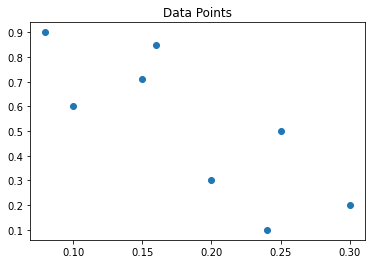

Points are:
 [[0.1  0.6 ]
 [0.15 0.71]
 [0.08 0.9 ]
 [0.16 0.85]
 [0.2  0.3 ]
 [0.25 0.5 ]
 [0.24 0.1 ]
 [0.3  0.2 ]]
Clusters are:
[[0.1, 0.6], [0.15, 0.71], [0.08, 0.9], [0.16, 0.85], [0.25, 0.5]]
[[0.2, 0.3], [0.24, 0.1], [0.3, 0.2]]
P6 belongs to cluster 1
Population of cluster around m2: 3
Updated value of centroids:
C1: [0.148, 0.712]
C2: [0.24666666666666667, 0.20000000000000004]


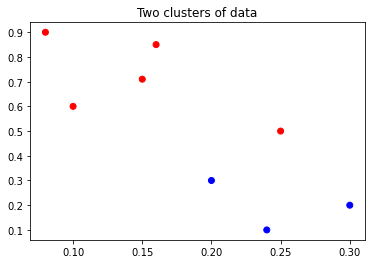

In [26]:
plt.scatter(X[:,0], X[:,1], marker="o")
plt.title('Data Points')
plt.show()
# print(X[0],X[7])
C1=X[0]
C2=X[7]
print("Points are:\n",X)
cluster(C1,C2)

K-Means Clustering using Scikit-Learn

In [27]:
initial_centriods = np.array([
    [0.1,0.6],
    [0.3,0.2]
],np.float64)

In [28]:
initial_centriods

array([[0.1, 0.6],
       [0.3, 0.2]])

In [31]:
km = KMeans(n_clusters=2,init=initial_centriods,n_init=1)
km.fit(points)
# y_pred = km.predict(X)
# print(y_pred)

KMeans(init=array([[0.1, 0.6],
       [0.3, 0.2]]), n_clusters=2, n_init=1)

In [32]:
print(km.labels_)

[0 0 0 0 1 0 1 1]


Which cluster does P6 belong to?

In [33]:
cluster_index = km.labels_[5]                        #array is 0 indexed, so P6 will be present at 5th index
print("P6 belongs to cluster {}".format(cluster_index+1))

P6 belongs to cluster 1


What is the population of cluster around m2?

In [34]:
count=0
for i in km.labels_:
    if i == 1:                              # "1" represents 2nd(M2) cluster
        count+=1
print("Population of Cluster around M2 is {}".format(count))        

Population of Cluster around M2 is 3


What is updated value of m1 and m2?

In [35]:
print("Updated values of M1 and M2 are {} and {} respectively".format(km.cluster_centers_[0],km.cluster_centers_[1]))

Updated values of M1 and M2 are [0.148 0.712] and [0.24666667 0.2       ] respectively


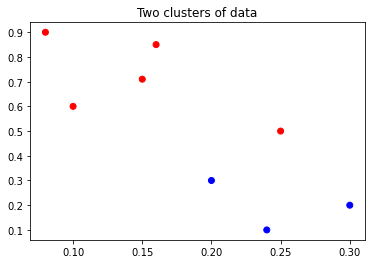

In [36]:
colors = list(map(lambda x: 'blue' if x == 1 else 'red', km.labels_))
plt.scatter(X[:,0], X[:,1], c=colors, marker="o")
plt.title('Two clusters of data')
plt.show()